## Mounting drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier

## Loading Dataset

In [ ]:
df = pd.read_csv('drive/MyDrive/Train_data.csv')
test_df = pd.read_csv('drive/MyDrive/Test_data.csv')

In [ ]:
df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
0,59.0,12.8,3.4,1.3,2.6,51.0,0.2,0.3,50.0,0.7,0.8,78.0,1.1,2.3,3.3,0.5,0.3,0.4,0.5,1
1,31.0,10.7,3.4,1.2,3.3,35.3,0.5,2.1,25.8,0.5,0.9,55.2,0.3,1.1,1.4,0.4,0.3,0.1,0.2,0
2,48.0,9.3,4.5,1.7,3.4,49.7,0.0,0.1,0.0,1.2,1.9,61.5,0.4,0.8,1.2,0.8,0.5,0.4,1.0,0
3,80.0,27.7,11.2,3.5,9.4,37.4,1.3,4.1,32.9,2.8,3.3,85.0,0.8,1.6,2.4,3.9,1.3,0.1,2.2,1
4,58.0,18.4,5.8,1.9,5.3,36.7,0.0,0.1,25.0,1.9,3.1,61.7,0.5,0.7,1.2,1.9,1.1,0.2,1.7,0


In [ ]:
df.shape

(1101, 20)

Converting Games Played to integer

In [ ]:
df['GP'] = df['GP'].astype('int')
test_df['GP'] = test_df['GP'].astype('int')

In [ ]:
df.isnull().any()

GP         False
MIN        False
PTS        False
FGM        False
FGA        False
FG%        False
3P Made    False
3PA        False
3P%        False
FTM        False
FTA        False
FT%        False
OREB       False
DREB       False
REB        False
AST        False
STL        False
BLK        False
TOV        False
Target     False
dtype: bool

No null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GP       1101 non-null   int64  
 1   MIN      1101 non-null   float64
 2   PTS      1101 non-null   float64
 3   FGM      1101 non-null   float64
 4   FGA      1101 non-null   float64
 5   FG%      1101 non-null   float64
 6   3P Made  1101 non-null   float64
 7   3PA      1101 non-null   float64
 8   3P%      1101 non-null   float64
 9   FTM      1101 non-null   float64
 10  FTA      1101 non-null   float64
 11  FT%      1101 non-null   float64
 12  OREB     1101 non-null   float64
 13  DREB     1101 non-null   float64
 14  REB      1101 non-null   float64
 15  AST      1101 non-null   float64
 16  STL      1101 non-null   float64
 17  BLK      1101 non-null   float64
 18  TOV      1101 non-null   float64
 19  Target   1101 non-null   int64  
dtypes: float64(18), int64(2)
memory usage: 172.2 KB


## Performing Exploratory Data Analysis

In [ ]:
df.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
count,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000
mean,58.915531,16.928284,6.502344,2.511125,5.645747,43.912555,0.241959,0.767455,19.050425,1.241914,1.741848,70.495847,0.958240,1.937014,2.891927,1.472706,0.589403,0.344204,1.150499,0.499546
std,17.264655,8.034209,4.163856,1.611502,3.422292,6.106910,0.363008,1.017214,15.513640,0.937585,1.272047,10.381068,0.771344,1.342627,2.039694,1.376592,0.386147,0.418840,0.687706,0.500227
min,11.000000,3.100000,1.100000,0.400000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,46.000000,10.492268,3.587756,1.400000,3.200000,40.000000,0.000000,0.000000,0.000000,0.600000,0.900000,64.900000,0.400000,1.000000,1.400000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,59.000000,15.386486,5.200000,2.000000,4.600000,43.652785,0.100000,0.300000,22.600000,1.000000,1.400000,71.502462,0.700000,1.600000,2.273596,1.041951,0.500000,0.200000,0.988945,0.000000
75%,76.000000,21.830403,8.300000,3.200000,6.900000,47.700000,0.400000,1.195634,32.300000,1.600000,2.200000,77.436718,1.300000,2.500000,3.700000,1.900000,0.800000,0.400000,1.400000,1.000000
max,82.000000,40.900000,24.300000,9.000000,18.900000,73.700000,2.300000,6.500000,100.000000,7.500000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.200000,1.000000


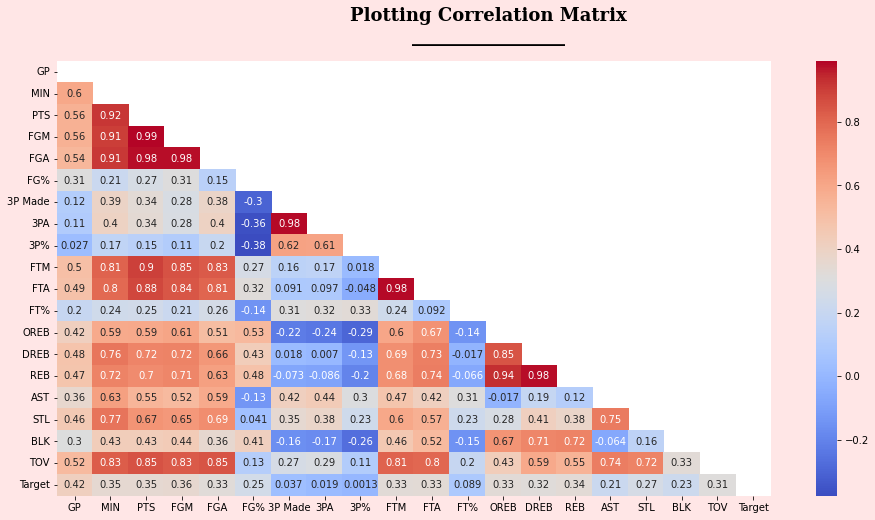

In [ ]:
# Converting categorical object type to sparse matrix
corr_matrix = df.corr()
# Create a mask
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig=plt.figure(figsize=(16, 8))
fig.suptitle('Plotting Correlation Matrix\n_________________', y=0.94, horizontalalignment='center', verticalalignment='center',fontsize=18, fontweight='bold',
              fontfamily='serif', color="black")
background_color = "#ffe6e6"
fig.patch.set_facecolor(background_color)

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm')
plt.show()

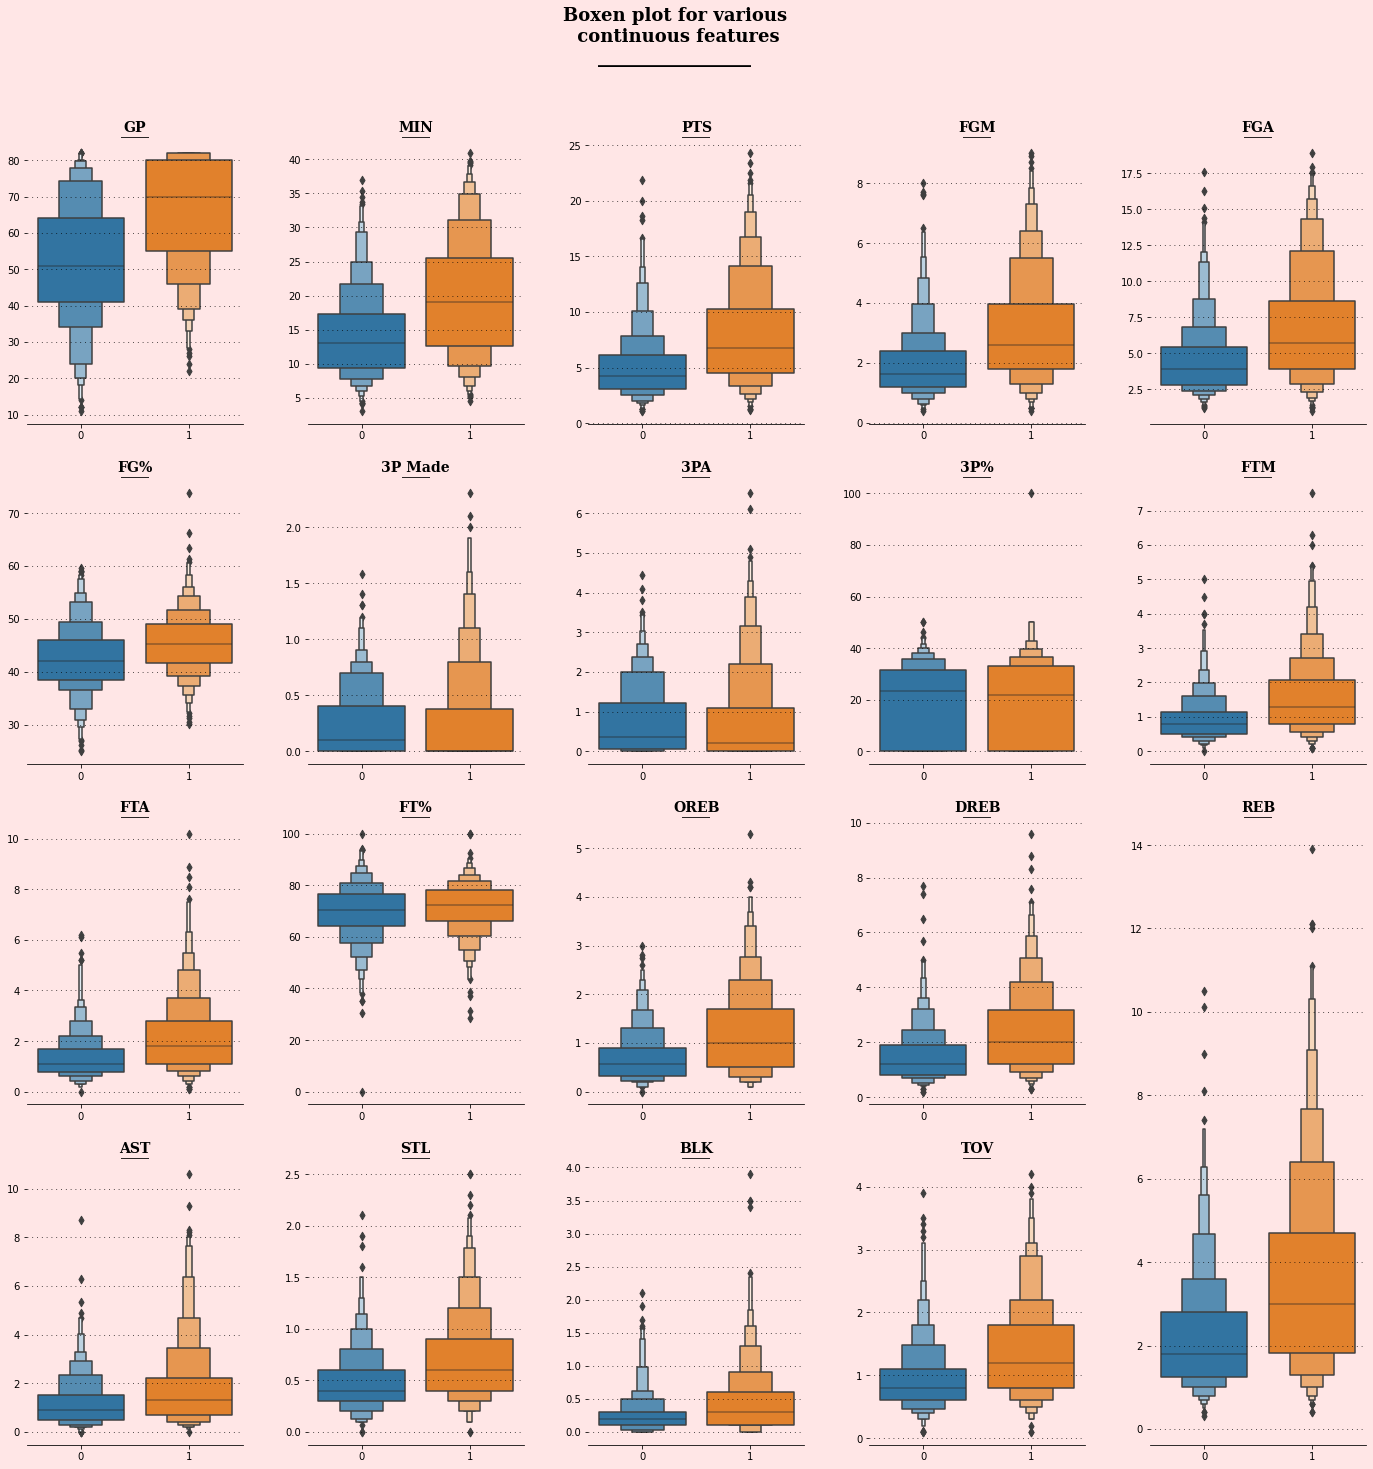

In [ ]:
fig=plt.figure(figsize=(24,24))
gs=fig.add_gridspec(4,5)
gs.update(wspace=0.3, hspace=0.2)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[0,2])
ax4=fig.add_subplot(gs[0,3])
ax5=fig.add_subplot(gs[0,4])
ax6=fig.add_subplot(gs[1,0])
ax7=fig.add_subplot(gs[1,1])
ax8=fig.add_subplot(gs[1,2])
ax9=fig.add_subplot(gs[1,3])
ax10=fig.add_subplot(gs[1,4])
ax11=fig.add_subplot(gs[2,0])
ax12=fig.add_subplot(gs[2,1])
ax13=fig.add_subplot(gs[2,2])
ax14=fig.add_subplot(gs[2,3])
ax15=fig.add_subplot(gs[2:4,4])
ax16=fig.add_subplot(gs[3,0])
ax17=fig.add_subplot(gs[3,1])
ax18=fig.add_subplot(gs[3,2])
ax19=fig.add_subplot(gs[3,3])

fig.suptitle('Boxen plot for various\n continuous features\n_________________', y=0.94, horizontalalignment='center', verticalalignment='center',fontsize=18, fontweight='bold',
              fontfamily='serif', color="black")
fig.patch.set_facecolor("#ffe6e6")

def plot_continuous_features(ax, y):
  ax.set_title(f'{y}''\n____', linespacing=0, fontsize=14, fontweight='bold', fontfamily='serif')
  sns.boxenplot(data=df, x='Target', y=f'{y}', ax=ax)
  ax.grid(color='black', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
  ax.set_ylabel(None)
  ax.set_xlabel(None)
  ax.set_facecolor(background_color)
  for borders in ["top","right","left"]:
    ax.spines[borders].set_visible(False)

axis = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16, ax17, ax18, ax19]

for ax, column in zip(axis, df.columns):
  plot_continuous_features(ax, column)

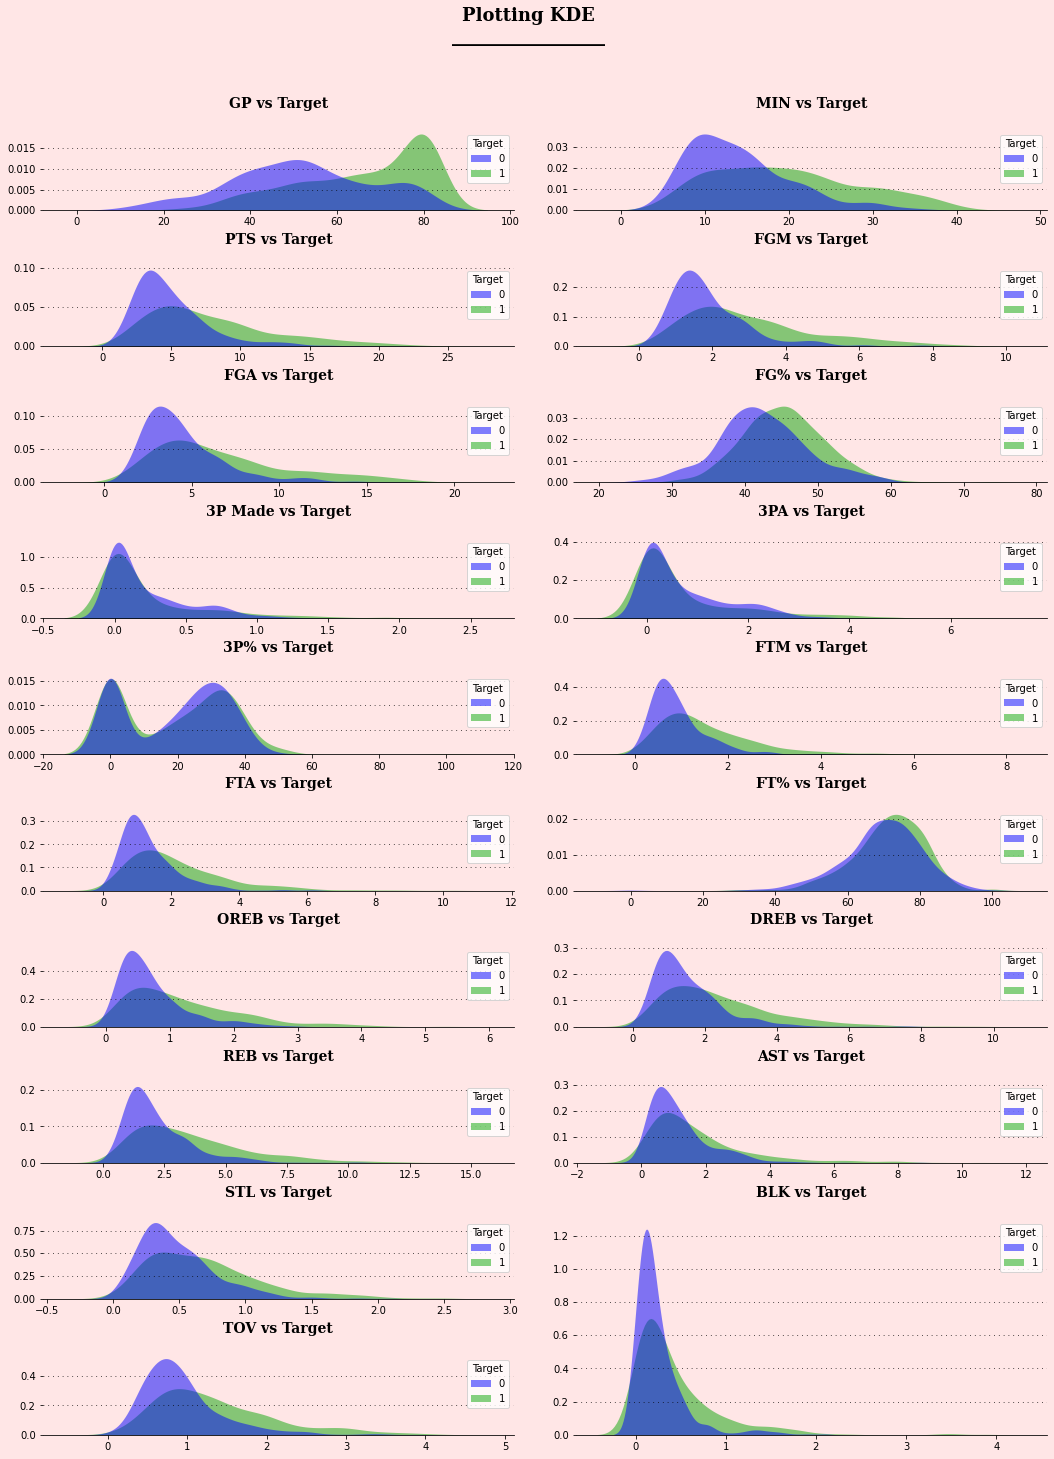

In [ ]:
fig=plt.figure(figsize=(18,24))
gs=fig.add_gridspec(10,4)
gs.update(wspace=0.3, hspace=0.7)
ax1=fig.add_subplot(gs[0,0:2])
ax2=fig.add_subplot(gs[0,2:4])
ax3=fig.add_subplot(gs[1,0:2])
ax4=fig.add_subplot(gs[1,2:4])
ax5=fig.add_subplot(gs[2,0:2])
ax6=fig.add_subplot(gs[2,2:4])
ax7=fig.add_subplot(gs[3,0:2])
ax8=fig.add_subplot(gs[3,2:4])
ax9=fig.add_subplot(gs[4,0:2])
ax10=fig.add_subplot(gs[4,2:4])
ax11=fig.add_subplot(gs[5,0:2])
ax12=fig.add_subplot(gs[5,2:4])
ax13=fig.add_subplot(gs[6,0:2])
ax14=fig.add_subplot(gs[6,2:4])
ax15=fig.add_subplot(gs[7,0:2])
ax16=fig.add_subplot(gs[7,2:4])
ax17=fig.add_subplot(gs[8,0:2])
ax18=fig.add_subplot(gs[8:10,2:4])
ax19=fig.add_subplot(gs[9,0:2])

fig.suptitle('Plotting KDE\n_________________', y=0.94, horizontalalignment='center', verticalalignment='center',fontsize=18, fontweight='bold',
              fontfamily='serif', color="black")
fig.patch.set_facecolor("#ffe6e6")

def plot_kde(ax, y):
  ax.set_title(f'{y} vs Target\n', fontsize=14, fontweight='bold', fontfamily='serif')
  sns.kdeplot(data=df, x=f'{y}', ax=ax, hue='Target', fill=True, palette=['blue', '#0ca607'], linewidth=0, alpha=0.5)
  ax.grid(True, axis='y', color='black', linestyle=':', dashes=(1,5))
  ax.set_ylabel(None)
  ax.set_xlabel(None)
  ax.set_facecolor(background_color)
  for borders in ["top","right","left"]:
    ax.spines[borders].set_visible(False)

axis = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16, ax17, ax18, ax19]

for ax, column in zip(axis, df.columns):
  plot_kde(ax, column)

**Results of Exploratory Data Analysis:**

1. Players who have played a higher number of games have a better career.
2. Players who get more minutes of playtime per game flourish more.
3. Players who score 5 points or higher per game are better.
4. Players who on average get more than 2 rebounds have a better career.
5. Players with 1 or more turnovers per game have a long career.

In [ ]:
target = df.pop('Target')

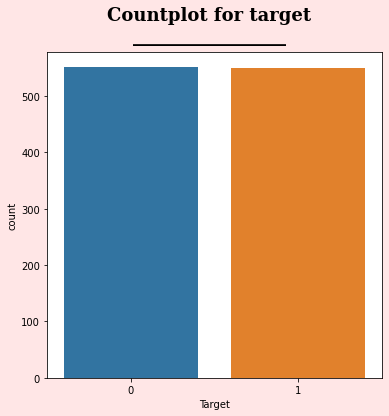

In [ ]:
fig=plt.figure(figsize=(6, 6))
fig.suptitle('Countplot for target\n_________________', y=0.94, horizontalalignment='center', verticalalignment='center',fontsize=18, fontweight='bold',
              fontfamily='serif', color="black")
background_color = "#ffe6e6"
fig.patch.set_facecolor(background_color)

sns.countplot(x=target)
plt.show()

No class imbalance

## Preprocessing the data

In [ ]:
df1 = df.copy()
scaler = StandardScaler()
df1 = scaler.fit_transform(df1)
test_df = scaler.transform(test_df)

## Training Model

In [ ]:
def cv(model):
  cv = cross_validate(model, df1, target, scoring=('accuracy', 'f1', 'precision', 'recall', 'roc_auc'), cv=3, n_jobs=-1)
  return cv

In [ ]:
xgb = XGBClassifier(depth=6, n_estimators=1000000, min_child_weight=7, colsample_bytree=0.3, learning_rate=0.01, n_jobs=-1, random_state=42)
# cv(xgb)

*To get good hyper-parameters I used n_estimators=1000 and finally trained on n_estimators=1000000*

In [ ]:
parameters = {
              # "learning_rate":[0.001, 0.003, 0.01, 0.03],
              # "min_child_weight":[ 1, 3, 5, 7, 9, 11, 13],
              "colsample_bytree":[0.1, 0.2, 0.3, 0.4, 0.5 , 0.7],
}

clf = GridSearchCV(xgb, parameters, n_jobs=-1, scoring='accuracy')
clf.fit(df1, target)

GridSearchCV(estimator=XGBClassifier(colsample_bytree=0.3, depth=7,
                                     learning_rate=0.01, min_child_weight=7,
                                     n_estimators=1000, n_jobs=-1,
                                     random_state=42),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.1, 0.2, 0.3, 0.4, 0.5, 0.7]},
             scoring='accuracy')

In [ ]:
clf.best_estimator_

XGBClassifier(colsample_bytree=0.3, depth=7, learning_rate=0.01,
              min_child_weight=7, n_estimators=1000, n_jobs=-1,
              random_state=42)

In [ ]:
clf.best_score_

0.7238790621143563

In [ ]:
cv(clf.best_estimator_)

{'fit_time': array([1.33412814, 1.33912992, 0.89858532]),
 'score_time': array([0.03987241, 0.0403471 , 0.02836204]),
 'test_accuracy': array([0.73569482, 0.73024523, 0.69482289]),
 'test_f1': array([0.72829132, 0.72268908, 0.69060773]),
 'test_precision': array([0.75144509, 0.74137931, 0.69832402]),
 'test_recall': array([0.70652174, 0.70491803, 0.68306011]),
 'test_roc_auc': array([0.80001188, 0.79585412, 0.78217807])}

In [ ]:
xgb = clf.best_estimator_

In [ ]:
xgb.fit(df1, target)

XGBClassifier(colsample_bytree=0.3, depth=6, learning_rate=0.01,
              min_child_weight=7, n_estimators=1000000, n_jobs=-1,
              random_state=42)

Submitting

In [ ]:
submission = pd.DataFrame(xgb.predict(test_df), columns=['prediction'])
submission.to_csv('submission.csv', index = False)